In [35]:
import pandas as pd
import networkx as nx

In [36]:
df = pd.read_csv('news.csv')

In [37]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [38]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [39]:
sample = df[0:50]

In [40]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [41]:
sample

,ID,news,subject,month,day,year,label
0,0,white house presses congress on bill allowing ...,politics,9,21,2016,1
1,1,china urges cooperation after us brands it a c...,politics,12,19,2017,1
2,2,cleveland school officer placed on leave afte...,politics,1,8,2016,0
3,3,syrian democratic forces say reach deir alzor ...,politics,9,10,2017,1
4,4,senator talks all night as democrats fight tru...,politics,4,5,2017,1
5,5,san francisco just told trump in no uncertain...,politics,12,3,2016,0
6,6,this is clinton’s supreme court plan and it c...,politics,3,28,2016,0
7,7,uk's johnson raises hackles over ww2 'punishme...,politics,1,18,2017,1
8,8,senate blocks democratic plan to expand gun ba...,politics,6,20,2016,1
9,9,mike rowe a lesson on liberty that everyone sh...,politics,7,4,2016,0


In [42]:
sample['label'].value_counts()

label
1    28
0    22
Name: count, dtype: int64

In [43]:
graph = nx.Graph()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news'])

for idx, row in sample.iterrows():
    feature_tfidf_scores = tfidf_features[idx].toarray()[0]
    
    # Pair feature indices with their TF-IDF scores
    features_with_scores = list(enumerate(feature_tfidf_scores))
    
    # Sort the features based on their TF-IDF scores in descending order
    top_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 100 most prominent features
    necessary_features = top_features[:200]
    
    node_attrs = {
        'content': necessary_features,
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph.add_node(row['ID'], label=row['label'], **node_attrs)

In [45]:
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")

Node 0:
label : 1
content : [(4353, 0.32049218887911557), (1398, 0.24036914165933665), (980, 0.23742463348459217), (2045, 0.23126855153717768), (4465, 0.18501484122974216), (391, 0.16024609443955778), (3158, 0.16024609443955778), (3600, 0.16024609443955778), (2047, 0.1449172128697211), (2150, 0.1449172128697211), (3971, 0.1449172128697211), (3584, 0.14384272329010772), (2830, 0.1387611309223066), (2598, 0.1256051060251096), (1612, 0.11871231674229608), (2856, 0.11871231674229608), (3693, 0.11871231674229608), (4543, 0.10783630218470776), (2608, 0.1033834351724594), (3679, 0.09250742061487108), (3154, 0.09071213128019688), (5, 0.08012304721977889), (60, 0.08012304721977889), (145, 0.08012304721977889), (364, 0.08012304721977889), (1124, 0.08012304721977889), (1248, 0.08012304721977889), (1421, 0.08012304721977889), (1466, 0.08012304721977889), (2293, 0.08012304721977889), (2299, 0.08012304721977889), (2423, 0.08012304721977889), (2536, 0.08012304721977889), (2919, 0.08012304721977889), 

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [75]:
G1 = graph.copy()
G2 = graph.copy()
G3 = graph.copy() 
G4 = graph.copy()

In [83]:
def display_graph(graph):
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    # Draw nodes
    pos = nx.spring_layout(graph)  # Compute node positions
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='skyblue')
    
    # Draw edges
    nx.draw_networkx_edges(graph, pos)
    
    # # Draw edge labels
    # edge_labels = nx.get_edge_attributes(graph, 'weight')
    # nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=10)
    
    plt.title("Graph Visualization")  # Set the title
    plt.axis('off')  # Turn off axis
    plt.show()

# TEMPORAL PROXIMITY

In [84]:
sample['date'] = pd.to_datetime(sample[['year', 'month', 'day']])
time_threshold = pd.Timedelta(days=7)

def dayscalc(date1, date2):
    delta = date2 - date1
    return abs(delta.days)

for i in range(len(sample)):
    date_i = sample.iloc[i]['date']
    for j in range(i + 1, len(sample)):
        date_j = sample.iloc[j]['date']
        if abs((date_j - date_i).days) <= time_threshold.days:
            G1.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=dayscalc(date_i, date_j))

C:\Users\manis\AppData\Local\Temp\ipykernel_8008\1774725694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['date'] = pd.to_datetime(sample[['year', 'month', 'day']])


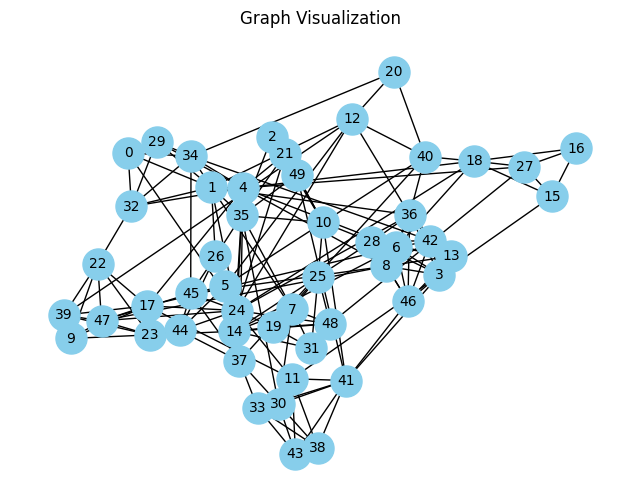

In [85]:
display_graph(G1)

# COSINE SIMILARITY

In [86]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_features)
similarity_threshold = 0.1

for i in range(len(sample)):
    for j in range(i + 1, len(sample)):
        if similarity_matrix[i, j] > similarity_threshold:
            G2.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_matrix[i, j])

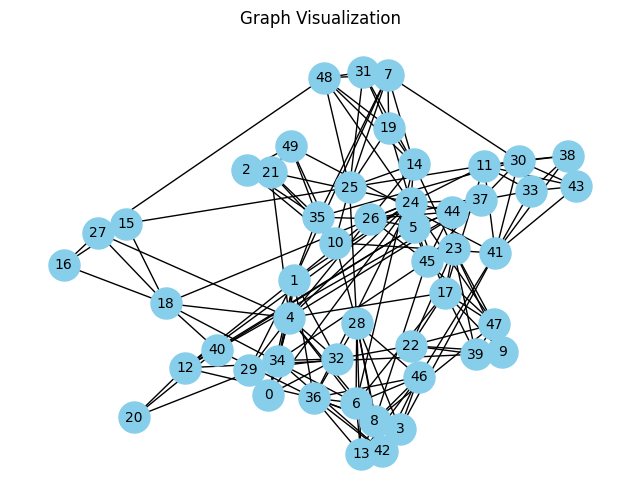

In [87]:
display_graph(G2)

# JOCCARD SIMILARITY OF WORD SETS

In [89]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

for i in range(len(sample)):
    words_i = set(sample.iloc[i]['news'].split())
    for j in range(i + 1, len(sample)):
        words_j = set(sample.iloc[j]['news'].split())
        similarity = jaccard_similarity(words_i, words_j)
        if similarity > 0.2:
            G3.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity)

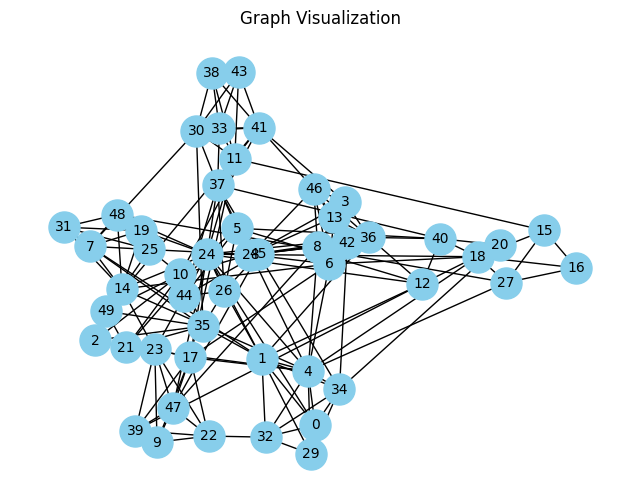

In [90]:
display_graph(G3)

# TOPIC MODELING SIMILARITY

In [92]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_features = lda.fit_transform(tfidf_features)

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(lda_features)
similarity_threshold = 0.9

for i in range(len(sample)):
    for j in range(i + 1, len(sample)):
        if similarity_matrix[i, j] > similarity_threshold:
            G4.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_matrix[i, j])

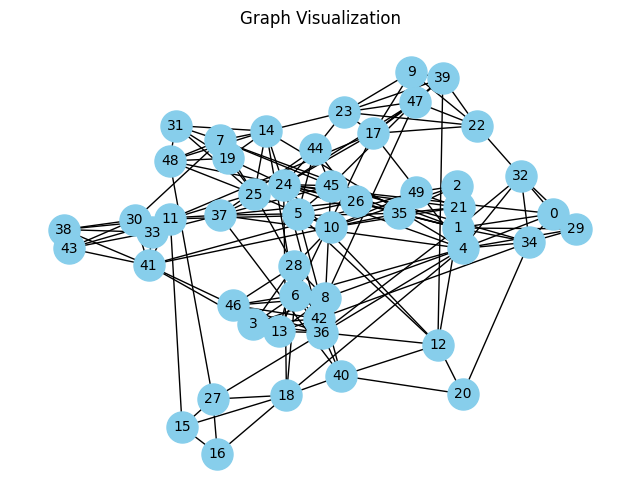

In [93]:
display_graph(G4)

# MODEL TRAINING

In [101]:
import torch

from torch_geometric.loader import DataLoader
from torch_geometric.data import Data

In [102]:
# Node features
all_node_features = []
labels_list = []

for node, content in G1.nodes(data=True):
    all_node_features.append(content.get('content'))
    labels_list.append(content.get('label'))

tensor_all_node_features = torch.tensor(all_node_features, dtype=torch.float)
labels = torch.tensor(labels_list, dtype=torch.long)

In [103]:
all_edge_features = []

for u, v, weight in G1.edges(data='weight'):
    #print(f"Edge: {u}-{v}, Weight: {weight}")
    all_edge_features.append(weight)

edge_attr = torch.tensor(all_edge_features, dtype=torch.float)

In [105]:
edges = [(edge[0], edge[1]) for edge in G1.edges]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

In [106]:
x_new = tensor_all_node_features.view(500,-1)

In [107]:
data = Data(x=x_new, edge_index=edge_index, edge_attr=edge_attr, y=labels)

In [108]:
# Accessing node features
print("Node features:")
print(data.x.shape)
print(data.x)

# Accessing edge indices
print("\nEdge indices:")
print(data.edge_index.shape)
print(data.edge_index)

# Accessing edge features (if available)
if data.edge_attr is not None:
    print("\nEdge features:")
    print(data.edge_attr.shape)
    print(data.edge_attr)

# Accessing node labels
if data.y is not None:
    print("\nNode labels:")
    print(data.y.shape)
    print(data.y)

Node features:
torch.Size([500, 40])
tensor([[4.3530e+03, 3.2049e-01, 1.3980e+03,  ..., 1.0338e-01, 3.6790e+03,
         9.2507e-02],
        [3.1540e+03, 9.0712e-02, 5.0000e+00,  ..., 8.0123e-02, 3.8650e+03,
         8.0123e-02],
        [4.0160e+03, 8.0123e-02, 4.2480e+03,  ..., 7.2459e-02, 3.1800e+03,
         7.2459e-02],
        ...,
        [5.5000e+01, 0.0000e+00, 5.6000e+01,  ..., 0.0000e+00, 7.4000e+01,
         0.0000e+00],
        [7.5000e+01, 0.0000e+00, 7.6000e+01,  ..., 0.0000e+00, 9.4000e+01,
         0.0000e+00],
        [9.5000e+01, 0.0000e+00, 9.6000e+01,  ..., 0.0000e+00, 1.1400e+02,
         0.0000e+00]])

Edge indices:
torch.Size([2, 182])
tensor([[ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
          2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,
          4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
       

In [109]:
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import GATConv
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


In [110]:
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_node_features = data.x.shape[1]
num_classes = len(torch.unique(labels))
model = GCN(num_node_features, num_classes)

In [111]:
from sklearn.model_selection import train_test_split

train_indices, val_indices = train_test_split(range(len(labels)), test_size=0.2, stratify=labels)

# Reindex the edges to ensure they refer to the correct subset of nodes
def reindex_edges(edge_index, indices):
    index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}
    new_edge_index = edge_index.clone()
    for i in range(edge_index.size(1)):
        new_edge_index[0, i] = index_map.get(edge_index[0, i].item(), -1)
        new_edge_index[1, i] = index_map.get(edge_index[1, i].item(), -1)
    valid_edges = (new_edge_index[0] != -1) & (new_edge_index[1] != -1)
    return new_edge_index[:, valid_edges]

# Create Data objects for train and validation sets
train_edge_index = reindex_edges(edge_index, train_indices)
val_edge_index = reindex_edges(edge_index, val_indices)

train_data = Data(x=data.x[train_indices], edge_index=train_edge_index, edge_attr=edge_attr, y=labels[train_indices])
val_data = Data(x=data.x[val_indices], edge_index=val_edge_index, edge_attr=edge_attr, y=labels[val_indices])

In [112]:
train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
val_loader = DataLoader([val_data], batch_size=1, shuffle=False)

In [113]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.nll_loss(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

In [114]:
def validate():
    model.eval()
    correct = 0
    for batch in val_loader:
        out = model(batch)
        pred = out.argmax(dim=1)
        correct += int((pred == batch.y).sum())
    return correct / len(val_loader.dataset)

In [115]:
for epoch in range(1200):  # Adjust the number of epochs as needed
    train_loss = train()
    val_accuracy = validate()
    print(f'Epoch {epoch+1}, Loss: {train_loss:.9f}, Validation Accuracy: {val_accuracy:.9f}')

Epoch 1, Loss: 3421.755371094, Validation Accuracy: 4.000000000
Epoch 2, Loss: 1787.740844727, Validation Accuracy: 5.000000000
Epoch 3, Loss: 524.435241699, Validation Accuracy: 6.000000000
Epoch 4, Loss: 562.763732910, Validation Accuracy: 7.000000000
Epoch 5, Loss: 952.818359375, Validation Accuracy: 6.000000000
Epoch 6, Loss: 1080.078735352, Validation Accuracy: 6.000000000
Epoch 7, Loss: 1036.244384766, Validation Accuracy: 6.000000000
Epoch 8, Loss: 892.686218262, Validation Accuracy: 7.000000000
Epoch 9, Loss: 675.579833984, Validation Accuracy: 7.000000000
Epoch 10, Loss: 409.386505127, Validation Accuracy: 6.000000000
Epoch 11, Loss: 245.111206055, Validation Accuracy: 4.000000000
Epoch 12, Loss: 366.554382324, Validation Accuracy: 3.000000000
Epoch 13, Loss: 488.960937500, Validation Accuracy: 4.000000000
Epoch 14, Loss: 522.125793457, Validation Accuracy: 4.000000000
Epoch 15, Loss: 471.414855957, Validation Accuracy: 4.000000000
Epoch 16, Loss: 382.110351562, Validation Acc